In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import numpy.fft as fft
import copy
import scipy.signal as signal
import scipy.interpolate as interp
import scipy.optimize as op
#import cosmology as cosmo

In [ ]:
#Load in the UCB measurements


In [3]:
def convFFT(x,y):
    nx=len(x)
    xf=np.pad(x,(nx/2,nx/2),mode='constant')
    yf=np.pad(y,(nx/2,nx/2),mode='constant')
    xf=(fft.fft(fft.fftshift(xf)))
    yf=(fft.fft(fft.fftshift(yf)))
    return fft.fftshift(np.real((fft.ifft(xf*yf))))[nx/2:3*nx/2]
def dconvFFT(x,y):
    nx=len(x)
    xf=np.pad(x,(nx/2,nx/2),mode='constant')
    yf=np.pad(y,(nx/2,nx/2),mode='constant')
    xf=(fft.fft(fft.fftshift(xf)))
    yf=(fft.fft(fft.fftshift(yf)))
    return np.real(fft.fftshift(fft.ifft(xf/yf)))[nx/2:3*nx/2]

In [85]:
planeWaveFeedAndDish=np.loadtxt('../data/feedSim_500ns_pW.txt',skiprows=2)
voltageResponseFeedAndDish=np.loadtxt('../data/feedSim_500ns_o1.txt',skiprows=2)

planeWaveFeedOnly=np.loadtxt('../data/PAPER_1000ns_pw.txt',skiprows=2)
voltageResponseFeedOnly=np.loadtxt('../data/PAPER_1000ns_o1.txt',skiprows=2)

ntFeedAndDish=len(planeWaveFeedAndDish)
dtFeedAndDish=voltageResponseFeedAndDish[1,0]-voltageResponseFeedAndDish[0,0]
dtFeedOnly=voltageResponseFeedOnly[1,0]-voltageResponseFeedOnly[0,0]
ntFeedOnly=len(planeWaveFeedOnly)

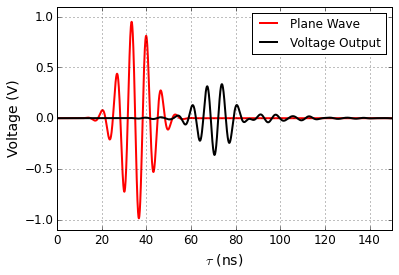

In [34]:
plt.plot(planeWaveFeedAndDish[:,0],planeWaveFeedAndDish[:,1],'-r',label='Plane Wave',lw=2)
plt.plot(voltageResponseFeedAndDish[:,0],voltageResponseFeedAndDish[:,1],'-k',label='Voltage Output',lw=2)
plt.xlabel('$\\tau$ (ns)',fontsize=14)
plt.ylabel('Voltage (V)',fontsize=14)
plt.legend(loc='upper right',fontsize=12)
plt.tick_params('x',labelsize=12)
plt.tick_params('y',labelsize=12)
plt.ylim(-1.1,1.1)
plt.grid()
#plt.plot(planeWaveFeed[::10,0],planeWaveFeed[::10,1],'o')
#plt.plot(voltageResponseFeed[::10,0],voltageResponseFeed[::10,1],'-o')
plt.xlim(0,150)
plt.savefig('../paper/figures/voltage_FeedAndDish.pdf',bbox_inches='tight')

In [138]:
#now look at FFT.
pwPadFeedAndDish=np.pad(planeWaveFeedAndDish[:,1],(ntFeedAndDish/2,ntFeedAndDish/2),mode='constant')
vrPadFeedAndDish=np.pad(voltageResponseFeedAndDish[:,1],(ntFeedAndDish/2,ntFeedAndDish/2),mode='constant')
                        
fAxisPadFeedAndDish=(fft.fftfreq(len(vrPadFeedAndDish),dtFeedAndDish))
fWaveFeedAndDish=fft.fft(fft.fftshift(pwPadFeedAndDish))
fResponseFeedAndDish=fft.fft(fft.fftshift(vrPadFeedAndDish))
dfFeedAndDish=fAxisPadFeedAndDish[1]-fAxisPadFeedAndDish[0]

selectionPos=np.logical_and(fAxisPadFeedAndDish>=50/1e3,fAxisPadFeedAndDish<=250/1e3)
selectionNeg=np.logical_and(-fAxisPadFeedAndDish>=50/1e3,-fAxisPadFeedAndDish<=250/1e3)
nSelect=len(fAxisPadFeedAndDish[selectionPos])
print nSelect
windowFeedAndDish=signal.blackmanharris(nSelect)
windowFeedAndDish=windowFeedAndDish/windowFeedAndDish.mean()
windowFeedAndDishFull=np.zeros(2*ntFeedAndDish)
windowFeedAndDishFull[selectionPos]=windowFeedAndDish
windowFeedAndDishFull[selectionNeg]=windowFeedAndDish
delayResponseFeedAndDish=(fft.ifft(fft.fftshift((windowFeedAndDishFull*fResponseFeedAndDish/fWaveFeedAndDish)[selectionPos])))
tAxisFeedAndDish=fft.fftfreq(len(delayResponseFeedAndDish),dfFeedAndDish)

204


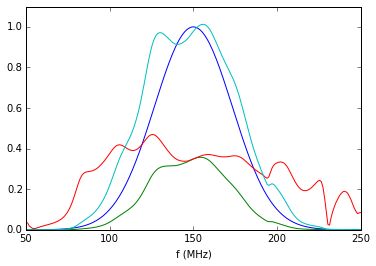

In [130]:
selection=np.logical_and(fAxisPadFeedAndDish>=50/1e3,fAxisPadFeedAndDish<=250/1e3)
plt.plot(fAxisPadFeedAndDish[selection]*1e3,(np.abs(fWaveFeedAndDish)/np.abs(fWaveFeedAndDish).max())[selection])
plt.plot(fAxisPadFeedAndDish[selection]*1e3,(np.abs(fResponseFeedAndDish)/np.abs(fWaveFeedAndDish).max())[selection])
plt.plot(fAxisPadFeedAndDish[selection]*1e3,np.abs(fResponseFeedAndDish/fWaveFeedAndDish)[selection])
plt.plot(fAxisPadFeedAndDish[selection]*1e3,np.abs(windowFeedAndDishFull*fResponseFeedAndDish/fWaveFeedAndDish)[selection])

#plt.xlim(-250,250)
plt.ylim(0,1.1)
plt.xlabel('f (MHz)')
plt.ylabel('')

(-80, 0)

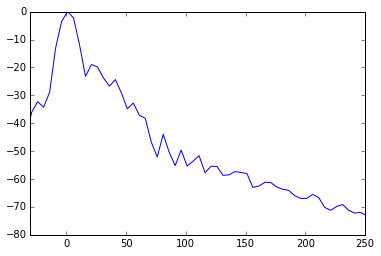

In [154]:
plt.plot(tAxisFeedAndDish-34,20.*np.log10(np.abs(delayResponseFeedAndDish)/np.abs(delayResponseFeedAndDish).max()))
plt.xlim(-30,250)
plt.ylim(-80,0)

In [140]:
#now look at FFT.
pwPadFeedOnly=np.pad(planeWaveFeedOnly[:,1],(ntFeedOnly/2,ntFeedOnly/2),mode='constant')
vrPadFeedOnly=np.pad(voltageResponseFeedOnly[:,1],(ntFeedOnly/2,ntFeedOnly/2),mode='constant')
                        
fAxisPadFeedOnly=(fft.fftfreq(len(vrPadFeedOnly),dtFeedOnly))
dfFeedOnly=fAxisPadFeedOnly[1]-fAxisPadFeedOnly[0]

fWaveFeedOnly=fft.fft(fft.fftshift(pwPadFeedOnly))
fResponseFeedOnly=fft.fft(fft.fftshift(vrPadFeedOnly))

selectionPos=np.logical_and(fAxisPadFeedOnly>=50/1e3,fAxisPadFeedOnly<=250/1e3)
selectionNeg=np.logical_and(-fAxisPadFeedOnly>=50/1e3,-fAxisPadFeedOnly<=250/1e3)
nSelect=len(fAxisPadFeedOnly[selectionPos])
print nSelect
windowFeedOnly=signal.blackmanharris(nSelect)
windowFeedOnly=windowFeedOnly/windowFeedOnly.mean()
windowFeedOnlyFull=np.zeros(2*ntFeedOnly)
windowFeedOnlyFull[selectionPos]=windowFeedOnly
windowFeedOnlyFull[selectionNeg]=windowFeedOnly
delayResponseFeedOnly=fft.ifft(fft.fftshift((windowFeedOnlyFull*fResponseFeedOnly/fWaveFeedOnly)[selectionPos]))
tAxisFeedOnly=fft.fftfreq(len(delayResponseFeedOnly),dfFeedOnly)

440


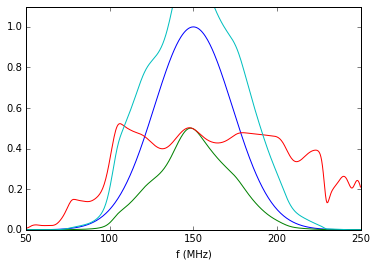

In [141]:
selection=np.logical_and(fAxisPadFeedOnly>=50/1e3,fAxisPadFeedOnly<=250/1e3)
plt.plot(fAxisPadFeedOnly[selection]*1e3,(np.abs(fWaveFeedOnly)/np.abs(fWaveFeedOnly).max())[selection])
plt.plot(fAxisPadFeedOnly[selection]*1e3,(np.abs(fResponseFeedOnly)/np.abs(fWaveFeedOnly).max())[selection])
plt.plot(fAxisPadFeedOnly[selection]*1e3,np.abs(fResponseFeedOnly/fWaveFeedOnly)[selection])
plt.plot(fAxisPadFeedOnly[selection]*1e3,np.abs(windowFeedOnlyFull*fResponseFeedOnly/fWaveFeedOnly)[selection])
#plt.xlim(-250,250)
plt.ylim(0,1.1)
plt.xlabel('f (MHz)')
plt.ylabel('')

In [126]:
#window and transform feed only measurement. 

(-80, 0)

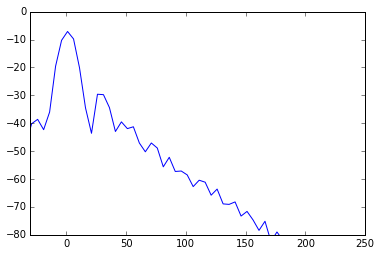

In [153]:
plt.plot(tAxisFeedOnly-34,20.*np.log10(np.abs(delayResponseFeedOnly)))
plt.xlim(-30,250)
plt.ylim(-80,0)